Задание:
    Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.
    Визуализируйте временной ряд и его основные характеристики.
    Разделите временной ряд на обучающую и тестовую выборку.
    Произведите прогнозирование временного ряда с использованием как минимум двух методов.
    Визуализируйте тестовую выборку и каждый из прогнозов.
    Оцените качество прогноза в каждом случае с помощью метрик.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ts_fb = pd.read_csv('/content/drive/MyDrive/rice_wheat_corn_prices.csv', header=0, index_col=0, parse_dates=True,)

In [ ]:
ts_fb

,Price_wheat_ton,Price_rice_ton,Price_corn_ton,Inflation_rate,Price_wheat_ton_infl,Price_rice_ton_infl,Price_corn_ton_infl
Year,,,,,,,
1992-02-01,170.12,278.25,113.62,89.59,322.53,527.53,215.41
1992-03-01,161.44,277.20,117.00,89.59,306.07,525.54,221.82
1992-04-01,153.07,278.00,108.52,89.59,290.21,527.06,205.74
1992-05-01,139.72,274.00,109.64,89.59,264.90,519.48,207.87
1992-06-01,140.36,268.80,110.90,89.59,266.11,509.62,210.26
...,...,...,...,...,...,...,...
2021-08-01,276.18,403.00,256.61,-1.29,272.62,397.80,253.30
2021-09-01,263.60,400.00,235.62,-1.29,260.20,394.84,232.58
2021-10-01,334.50,401.00,239.65,-1.29,330.18,395.83,236.56


In [ ]:
ts_fb=ts_fb[['Price_wheat_ton']]

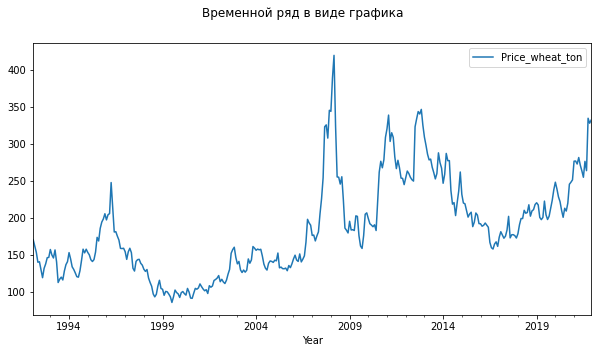

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
ts_fb.plot(ax=ax, legend=True)
pyplot.show()

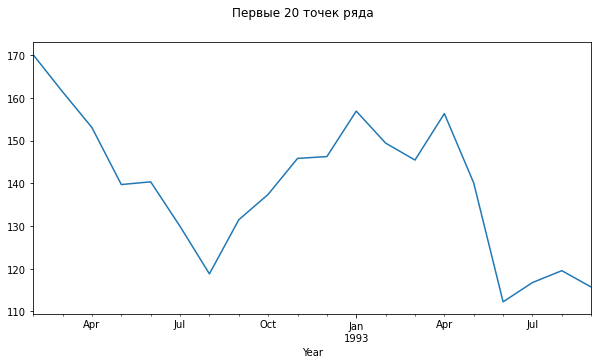

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 20 точек ряда')
ts_fb[:20].plot(ax=ax, legend=False)
pyplot.show()

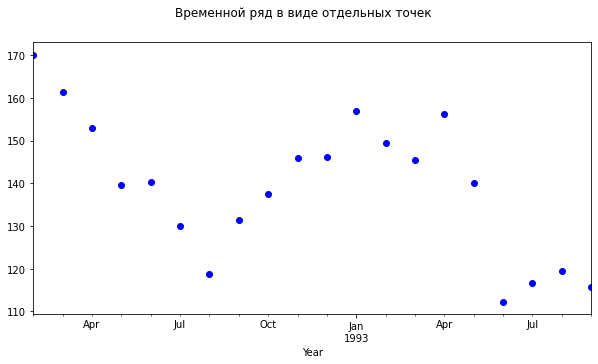

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде отдельных точек')
ts_fb[:20].plot(ax=ax, legend=False, style='bo')
pyplot.show()

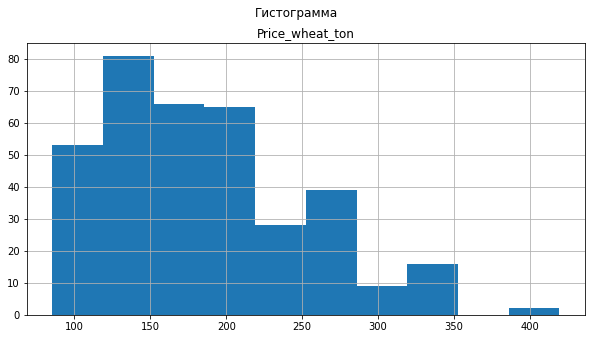

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
ts_fb.hist(ax=ax, legend=False)
pyplot.show()

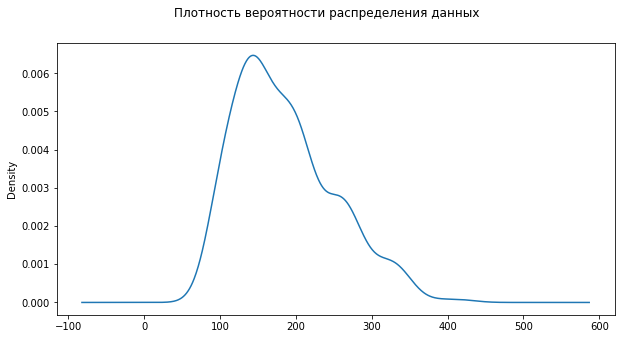

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
ts_fb.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

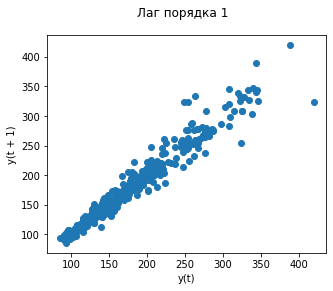

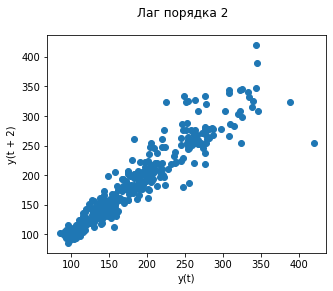

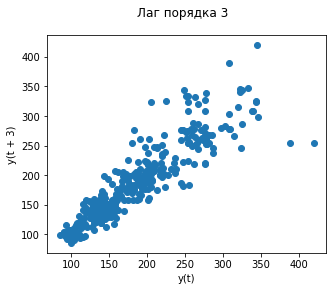

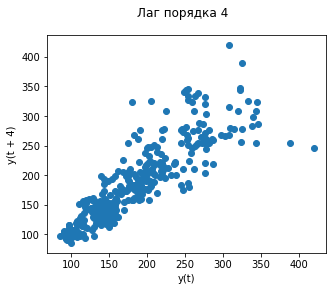

In [ ]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(ts_fb, lag=i, ax=ax)
    pyplot.show()

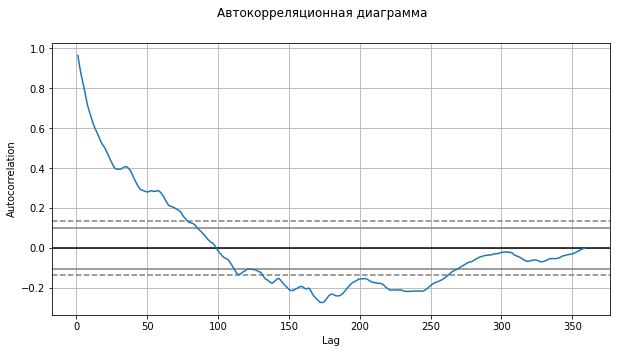

In [ ]:
# По оси Y откладывается ковариация 
# https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(ts_fb, ax=ax)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


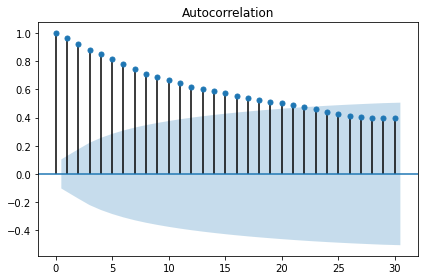

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_fb, lags=30)
plt.tight_layout()

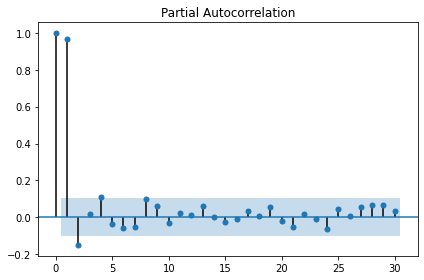

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts_fb, lags=30)
plt.tight_layout()

In [ ]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
from statsmodels.tsa.seasonal import seasonal_decompose
# Аддитивная модель
def plot_decompose(data=ts_fb['Price_wheat_ton'], model='add'):
    result_add = seasonal_decompose(data, model = 'add')
    fig = result_add.plot()
    fig.set_size_inches((10, 8))
    # Перерисовка
    fig.tight_layout()
    plt.show()

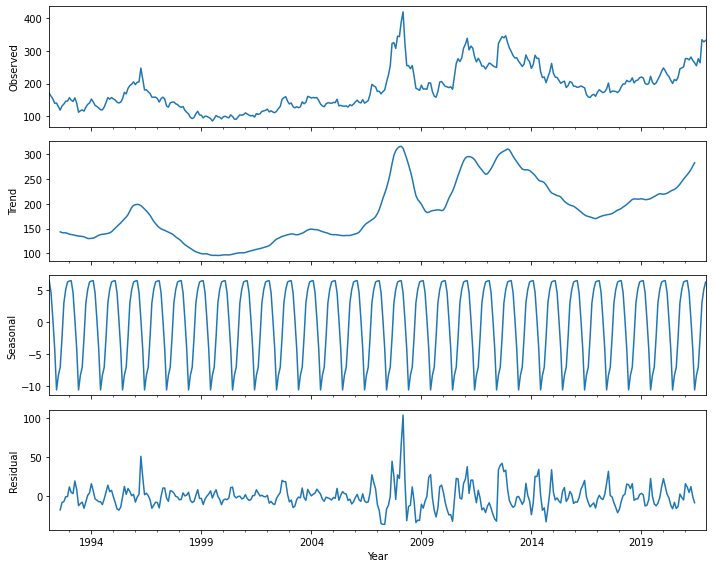

In [ ]:
plot_decompose(data=ts_fb['Price_wheat_ton'], model='add')

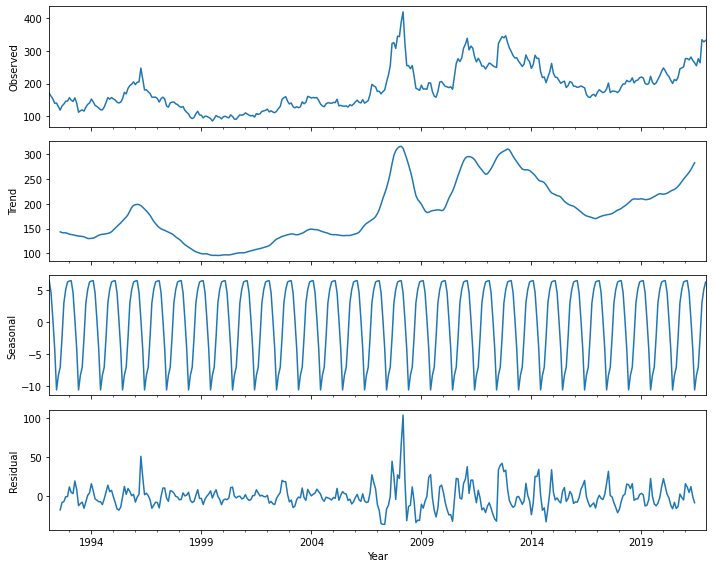

In [ ]:
plot_decompose(data=ts_fb['Price_wheat_ton'], model='mul')

In [ ]:
ts_fb2 = ts_fb.copy()

In [ ]:
# Простое скользящее среднее (SMA)
ts_fb2['SMA_10'] = ts_fb2['Price_wheat_ton'].rolling(10, min_periods=1).mean()
ts_fb2['SMA_20'] = ts_fb2['Price_wheat_ton'].rolling(20, min_periods=1).mean()

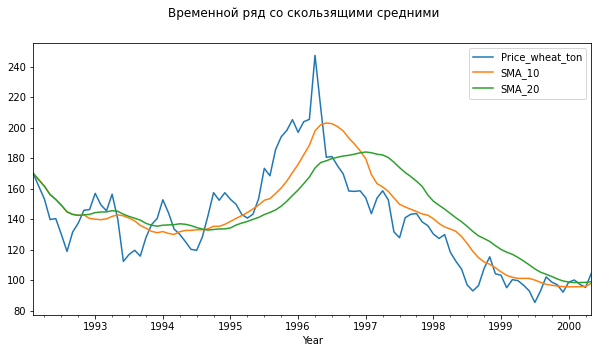

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
ts_fb2[:100].plot(ax=ax, legend=True)
pyplot.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Целочисленная метка шкалы времени 
xnum = list(range(ts_fb2.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = ts_fb2['Price_wheat_ton'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [ ]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [ ]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])
# Вычисление метрики RMSE
error_es = mean_squared_error(test, predictions_es, squared=False)

In [ ]:
# Ошибка прогноза
np.mean(Y), error_arima, error_es

(185.30286908077994, 14.94264993683283, 14.16217857011596)

In [ ]:
# Записываем предсказания в DataFrame
ts_fb2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
ts_fb2['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

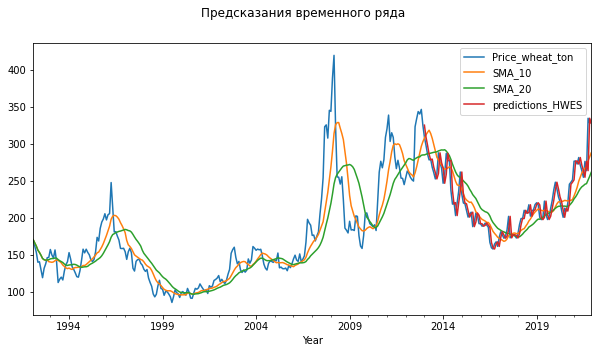

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
ts_fb2.plot(ax=ax, legend=True)
pyplot.show()

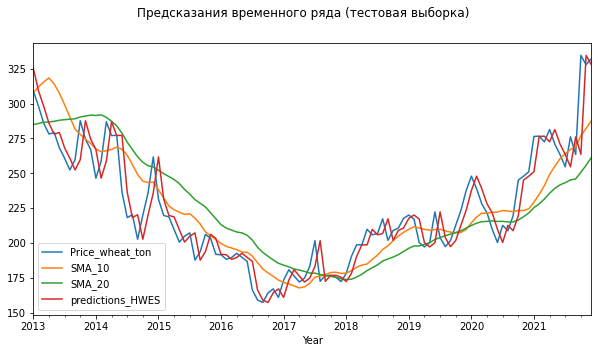

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_fb2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

In [ ]:
!pip install gplearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gplearn.genetic import SymbolicRegressor

In [ ]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [ ]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      3.88413e+54       39          8503.11              N/A      2.45m
   1   159.03      1.13335e+16       43          3956.42              N/A      1.10m
   2    61.32      1.22587e+10       33          3548.79              N/A     39.41s
   3    42.68      5.62364e+06       44          3528.96              N/A     35.00s
   4    42.96      9.87061e+10       29          3386.99              N/A     33.96s
   5    39.36      3.29032e+10       26          3376.33              N/A     32.38s
   6    37.80      1.26406e+06       55          3247.03              N/A     30.47s
   7    36.91      2.91967e+06       32          3205.54              N/A     33.09s
   8    43.67           594323       63          3155.85              N/A  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=70, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [ ]:
print(est_gp._program)

sub(sub(7.988, -13.099), sub(add(sub(add(div(sub(div(X0, add(div(add(24.003, 35.637), X0), div(X0, 20.271))), sub(sub(7.988, -13.099), sub(add(add(mul(add(sub(div(X0, 20.271), sin(-14.028)), mul(div(mul(X0, -15.756), sub(29.380, -14.101)), sin(add(div(X0, add(div(sub(X0, 75.483), X0), add(add(sub(div(X0, add(div(add(24.003, 35.637), X0), div(X0, 20.271))), 7.988), div(X0, 20.271)), mul(div(mul(X0, -15.756), X0), sin(add(div(X0, add(div(X0, add(div(add(24.003, 35.637), X0), div(X0, 20.271))), div(X0, 20.271))), sub(29.380, -14.101))))))), sub(29.380, -14.101))))), sin(add(div(X0, add(div(X0, add(div(add(24.003, 35.637), X0), div(X0, 20.271))), div(div(add(X0, X0), add(X0, 73.055)), 20.271))), sub(29.380, -14.101)))), div(X0, 20.271)), mul(div(div(X0, 20.271), add(24.003, 35.637)), sin(add(div(X0, add(div(div(X0, 20.271), X0), div(X0, 20.271))), sub(29.380, -14.101))))), sub(div(-13.099, X0), sub(mul(7.988, sin(div(sub(7.988, -13.099), add(24.003, 35.637)))), sub(sub(7.988, -13.099), div

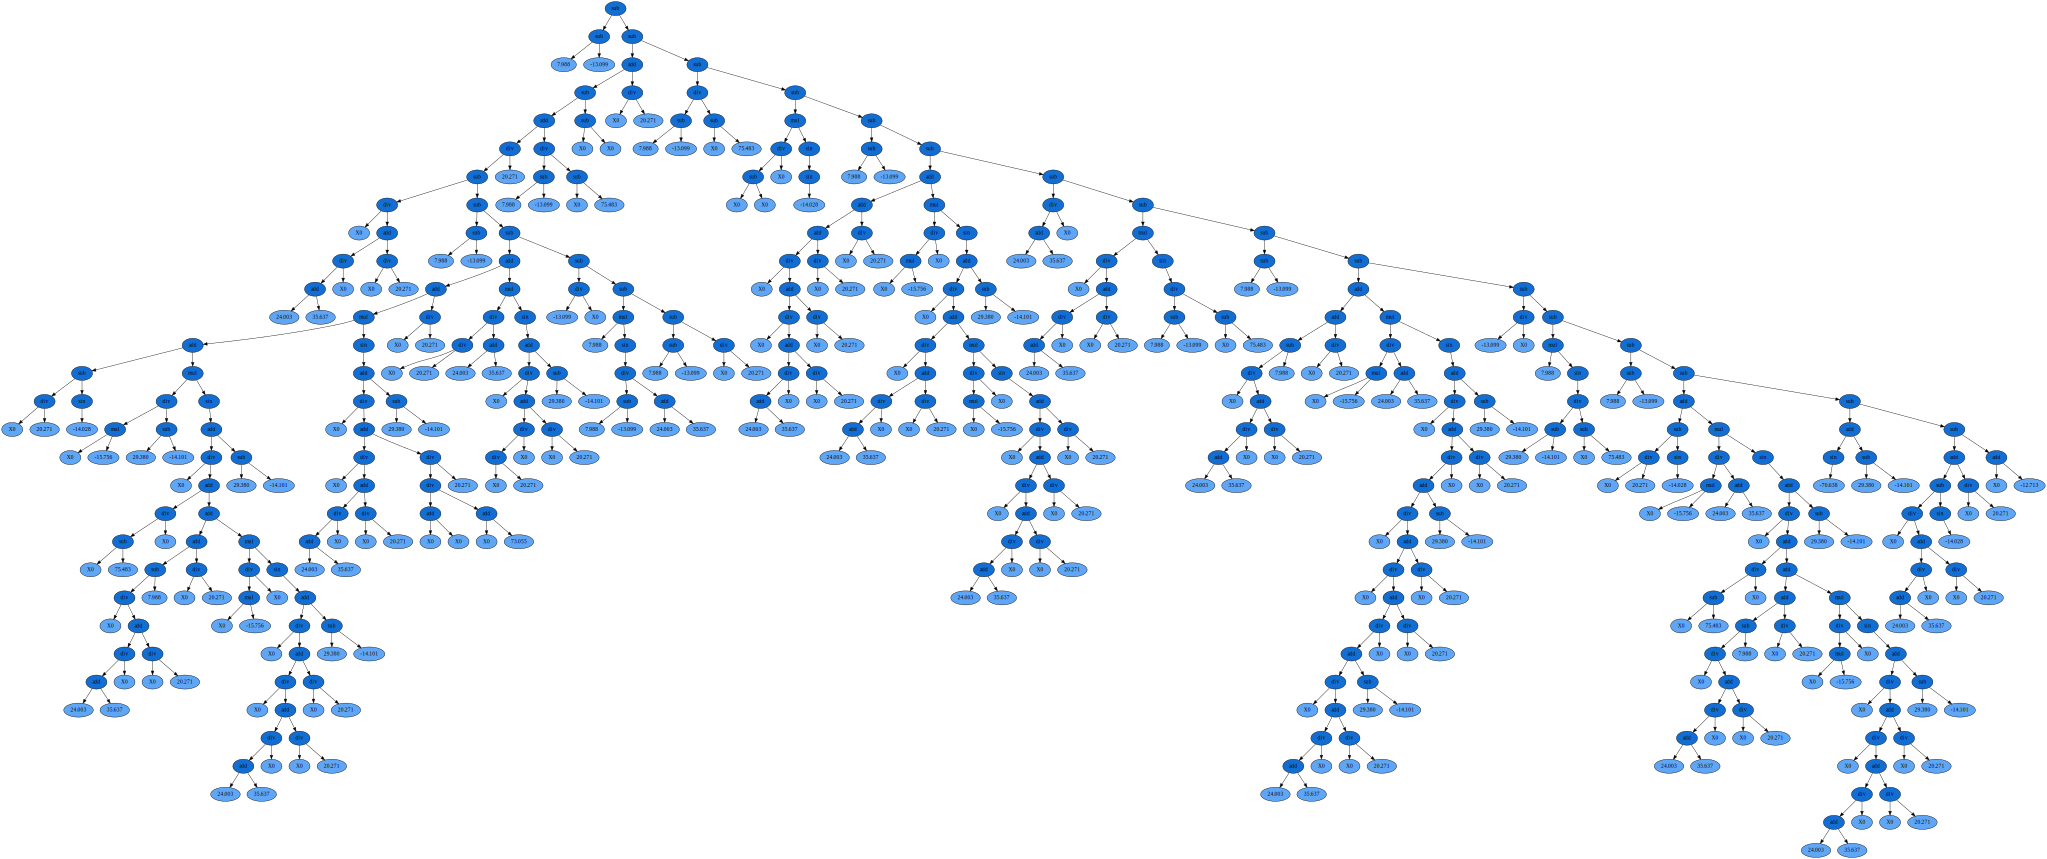

In [ ]:
import graphviz
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Предсказания
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([343.37133551, 332.01971105, 335.13155802, 299.0643972 ,
       279.19509901, 267.1495002 , 273.22696498, 253.35755502,
       232.9563561 , 234.70538715])

In [ ]:
# Записываем предсказания в DataFrame
ts_fb2['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

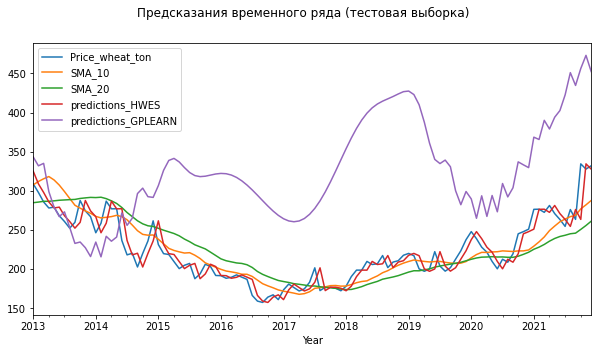

In [ ]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_fb2[train_size:].plot(ax=ax, legend=True)
pyplot.show()